# Steady State Examples

Here are some examples of how to run the BM1D model as a steady-state model in height. Running the model in the steady-state mode is really simple. When initializing the spectral_1d object, just specify $t_{\max}$ as $0$ as well as setting both the $z_{\mathrm{top}}$ and $z_{\mathrm{bot}}$ parameters. We'll also directly specify an initial exponential distribution with $N_{t,0}= 15\, \mathrm{L}^{-1}$ and $D_{m,0}=0.8$ mm as well as a hydrodynamic kernel with a sticking efficiency of $E_{s}=0.8$. Notice here that in order to specify an un-normalized gamma distribution with respect to size (rather than mass), we have to use the dist_var input. We'll also set the radar input to True so that the code will calculate radar variables for rain as well.

In [1]:
from binmod1d.spectral_model import spectral_1d

In [3]:
s3_SS = spectral_1d(sbin=3,bins=160,D1=0.001,tmax=0.,Nt0=15.,Dm0=0.8,mu0=0.,dz=10.0,ztop=1000.,zbot=0.,habit_list=['rain'],ptype='rain',kernel='Hydro',Ecol=1.0,Es=0.8,radar=True,dist_var='size')
s3_SS.run()

Running 1D spectral bin model
: 0it [00:00, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]


Model Complete! Time Elapsed = 0.11 min


Now we can use some of the plotting methods to look at the results. Typically in cloud and precipitation microphysics, particle size distributions (PSD) are often plotted in a semi-log space. Let's plot the beginning (top) and ending (bottom) PSDs. To do this, we use the plot_dists_height() method.

(<Figure size 800x1000 with 2 Axes>,
 array([<Axes: title={'center': 'Height = 1.0 km'}, ylabel='n(D) (1/cm$^{3}$ 1/mm)'>,
        <Axes: title={'center': 'Height = 0.0 km'}, xlabel='Equivolume Diameter (mm)', ylabel='n(D) (1/cm$^{3}$ 1/mm)'>],
       dtype=object))

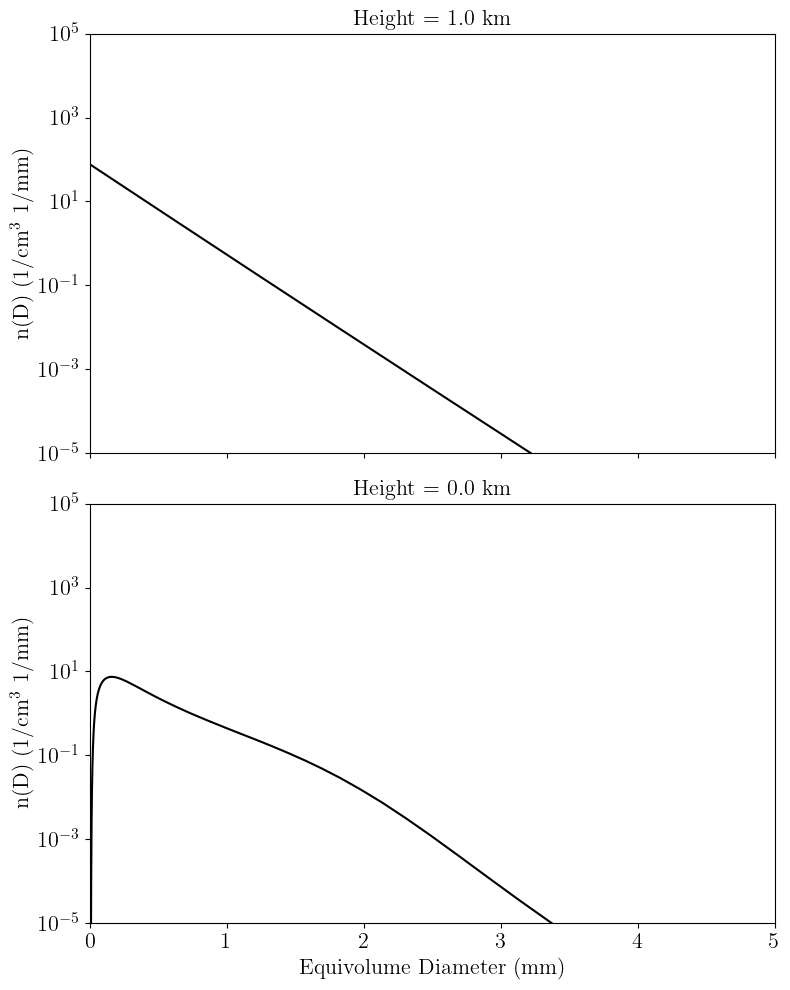

In [4]:
s3_SS.plot_dists_height()

Now let's plot some radar variables. To do this, we'll use the plot_moments_radar() method.

(<Figure size 1400x800 with 8 Axes>,
 array([[<Axes: xlabel='Nt (1/L)', ylabel='Height (km)'>,
         <Axes: xlabel='Dm (mm)'>, <Axes: xlabel='WC (g/m$^{3}$)'>,
         <Axes: xlabel='R (mm/hr)'>],
        [<Axes: xlabel='Z (dBZ)', ylabel='Height (km)'>,
         <Axes: xlabel='ZDR (dB)'>, <Axes: xlabel='Kdp (deg/km)'>,
         <Axes: xlabel='$\\rho_{\\mathrm{hv}}$'>]], dtype=object))

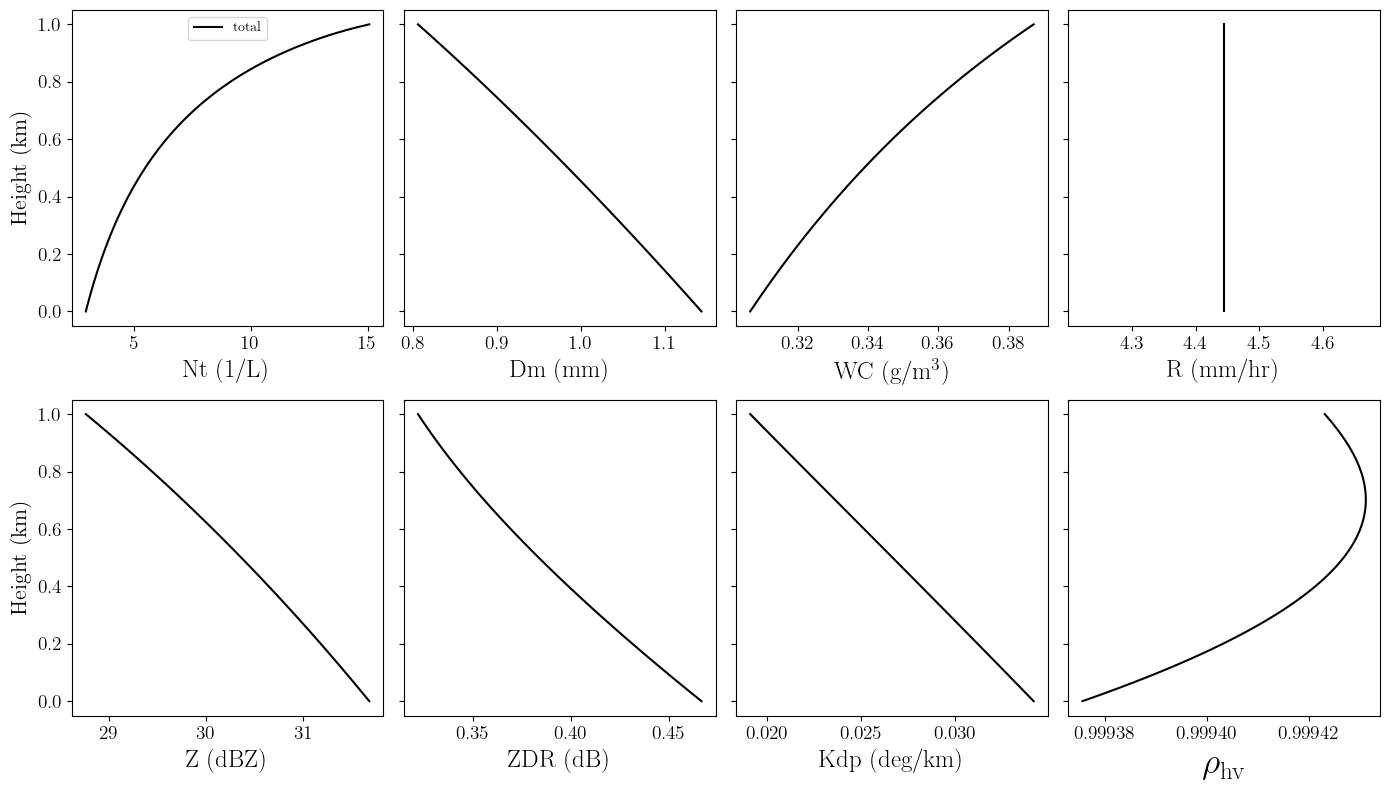

In [5]:
s3_SS.plot_moments_radar()

Now let's try to include collisional breakup. To do this, we'll set breakup efficiency $E_{b}=0.05$. We'll also extend the domain a bit to go from $z_{\mathrm{top}}=3000$ m to $z_{\mathrm{bot}}=0$ m.

In [5]:
s3_BC_SS = spectral_1d(sbin=3,bins=160,D1=0.001,tmax=0.,Nt0=15.,Dm0=0.8,mu0=0.,dz=10.0,ztop=3000.,zbot=0.,habit_list=['rain'],ptype='rain',kernel='Hydro',Ecol=1.0,Es=0.8,Eb=0.005,radar=True,dist_var='size')
s3_BC_SS.run()

Running 1D spectral bin model
: 0it [00:00, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]


Model Complete! Time Elapsed = 0.50 min


Now we'll redo the plots to look at the results

(<Figure size 1400x800 with 8 Axes>,
 array([[<Axes: xlabel='Nt (1/L)', ylabel='Height (km)'>,
         <Axes: xlabel='Dm (mm)'>, <Axes: xlabel='WC (g/m$^{3}$)'>,
         <Axes: xlabel='R (mm/hr)'>],
        [<Axes: xlabel='Z (dBZ)', ylabel='Height (km)'>,
         <Axes: xlabel='ZDR (dB)'>, <Axes: xlabel='Kdp (deg/km)'>,
         <Axes: xlabel='$\\rho_{\\mathrm{hv}}$'>]], dtype=object))

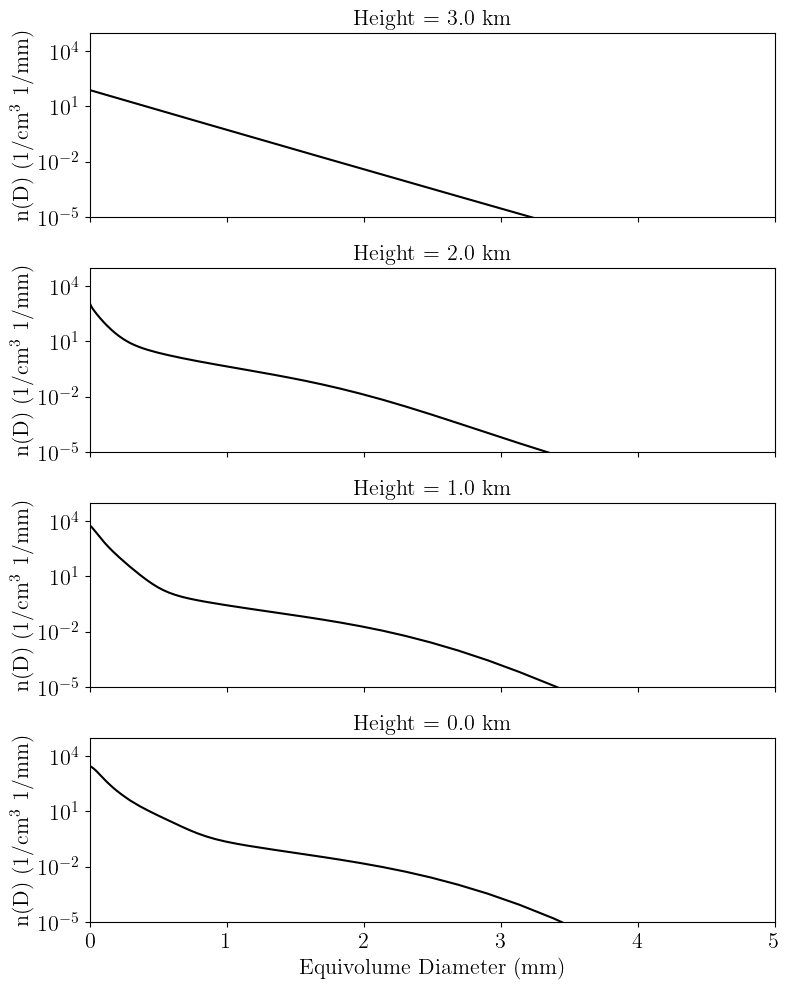

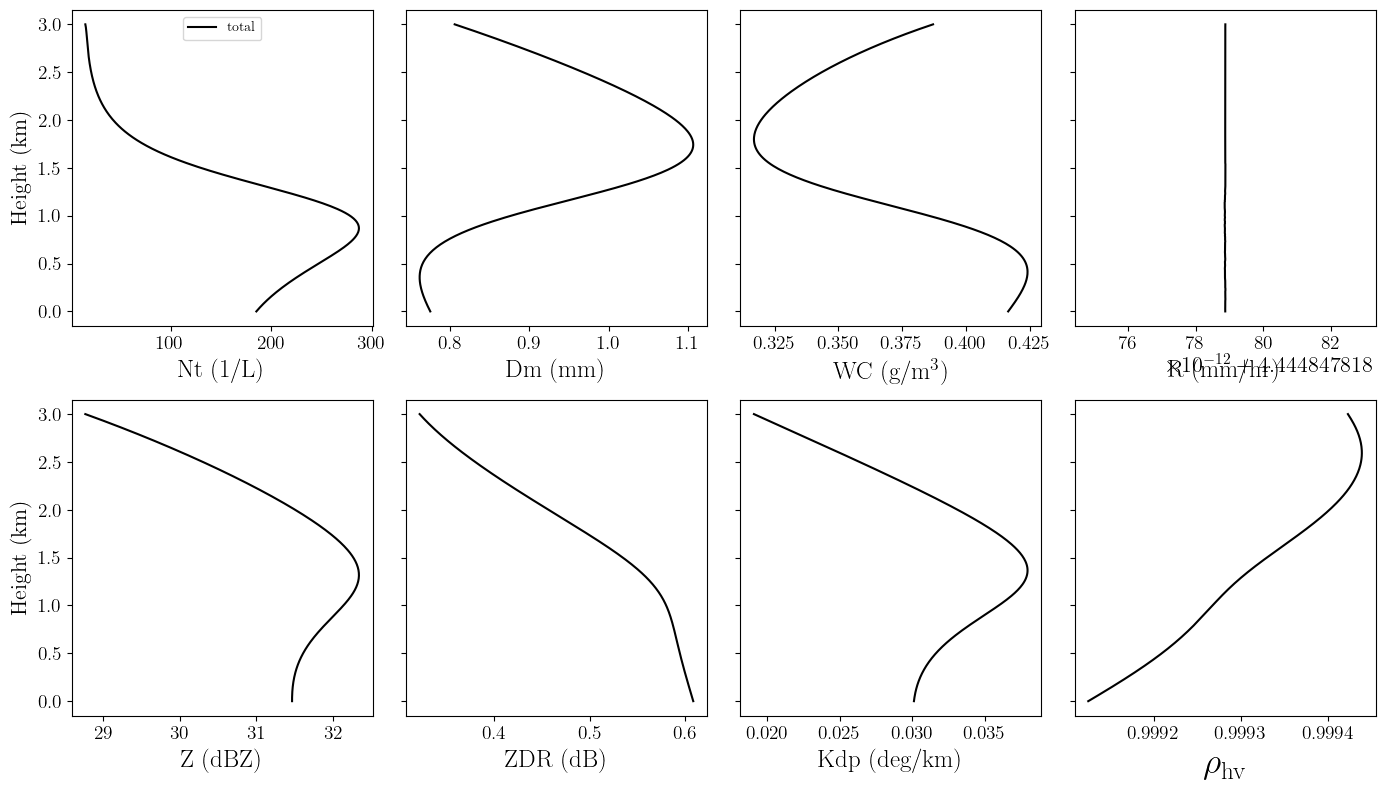

In [6]:
s3_BC_SS.plot_dists_height()
s3_BC_SS.plot_moments_radar()

Now we'll try a snow example. Here, we'll also use two categories in order to utilize different microphysical parameters for snow and fragments. To do this, we modify the habit_list input list to include snow and fragments. We also need to use the dist_num parameter to state that we want 2 categories and we'll use the cc_dest and br_dest parameters to specify that we want aggregated snowflakes to remain in the first snow category and fragments to be transferred to the fragment category.

In [7]:
s4_snow_SS = spectral_1d(sbin=4,bins=120,D1=0.01,tmax=0.,Nt0=50.,Dm0=1.0,mu0=3.,dz=10.0,ztop=3000.,zbot=0.,frag_dist='LGN',habit_list=['snow','fragments'],ptype='snow',kernel='Hydro',Ecol=0.5,Es=0.25,Eb=0.025,radar=True,dist_var='size',dist_num=2,cc_dest=1,br_dest=2)
s4_snow_SS.run()

Running 1D spectral bin model
: 0it [00:00, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]


Model Complete! Time Elapsed = 0.89 min


And again, let's plot the distributions and height profiles of microphysical and radar parameters. However, let's specify in each that we want to plot the individual and total distributions by using the plot_habits parameter

(<Figure size 1400x800 with 8 Axes>,
 array([[<Axes: xlabel='Nt (1/L)', ylabel='Height (km)'>,
         <Axes: xlabel='Dm (mm)'>, <Axes: xlabel='WC (g/m$^{3}$)'>,
         <Axes: xlabel='R (mm/hr)'>],
        [<Axes: xlabel='Z (dBZ)', ylabel='Height (km)'>,
         <Axes: xlabel='ZDR (dB)'>, <Axes: xlabel='Kdp (deg/km)'>,
         <Axes: xlabel='$\\rho_{\\mathrm{hv}}$'>]], dtype=object))

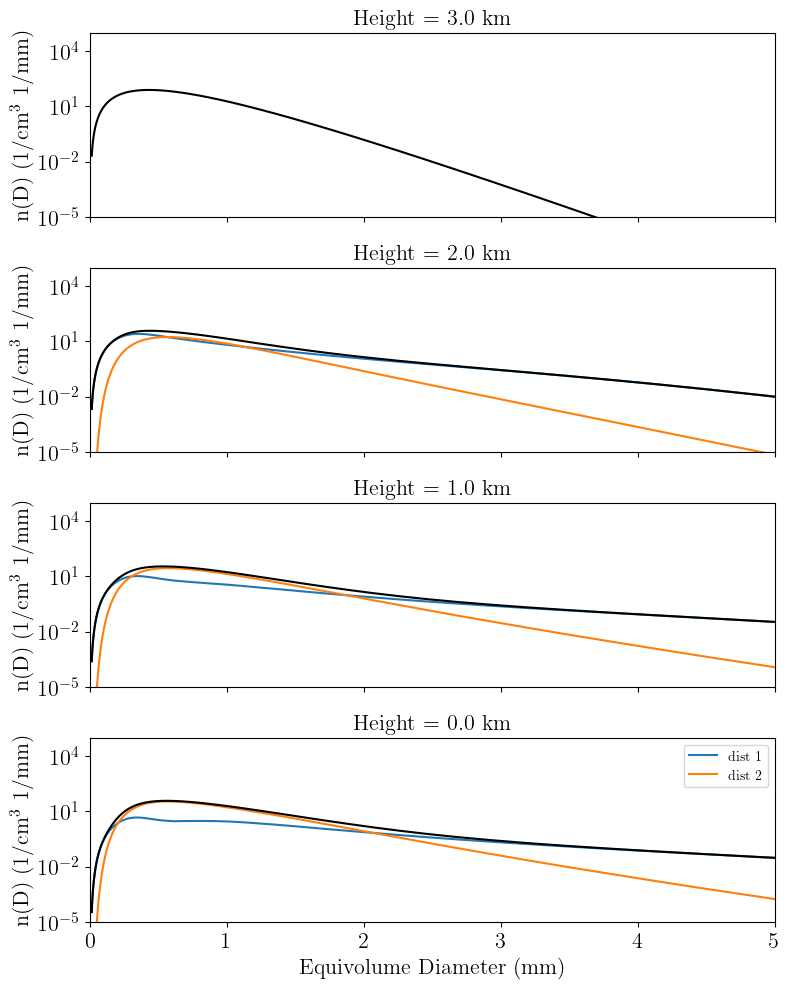

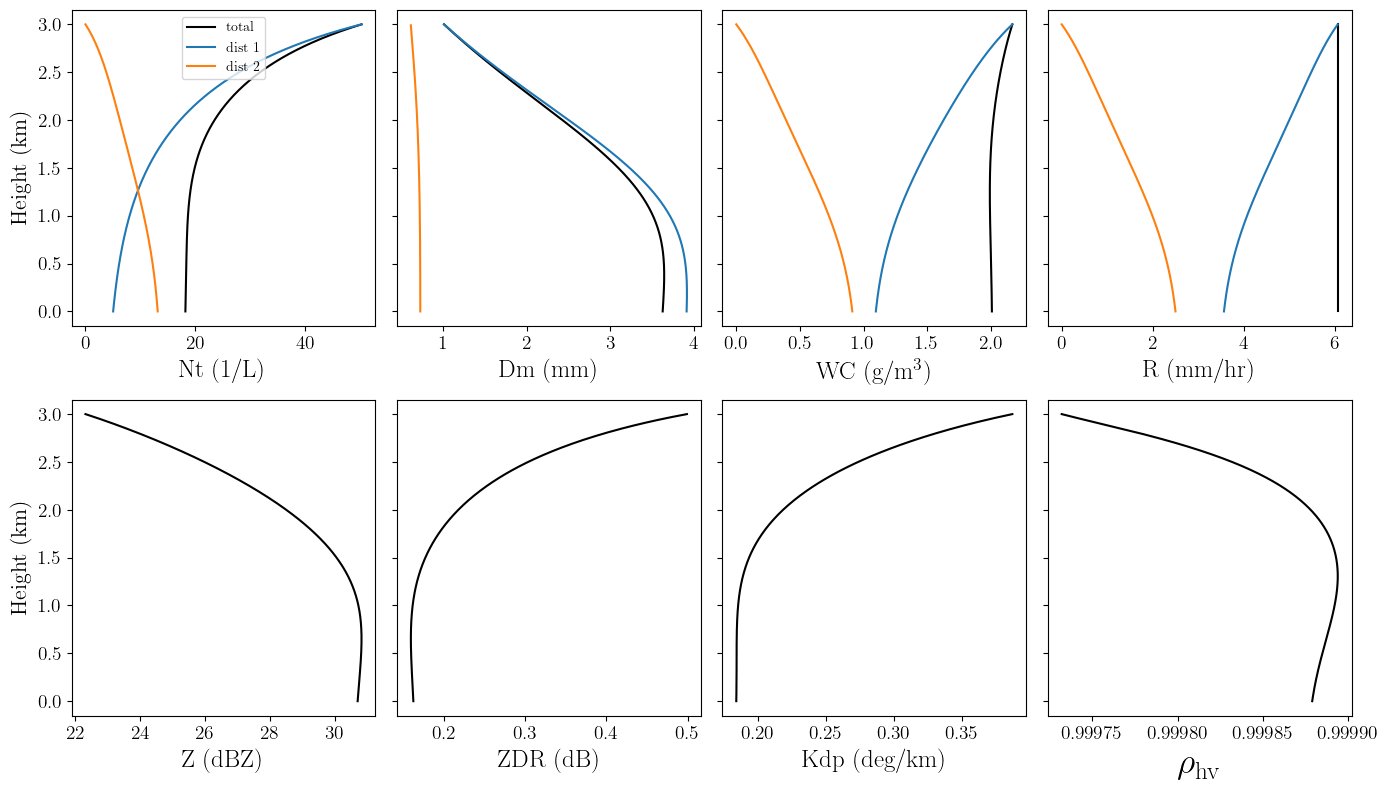

In [8]:
s4_snow_SS.plot_dists_height(plot_habits=True)
s4_snow_SS.plot_moments_radar(plot_habits=True)

Plotting distributions...


(<Figure size 800x1000 with 2 Axes>,
 array([<Axes: ylabel='dN/dlog(D)'>,
        <Axes: xlabel='log(D) [log(mm)]', ylabel='dM/dlog(D)'>],
       dtype=object))

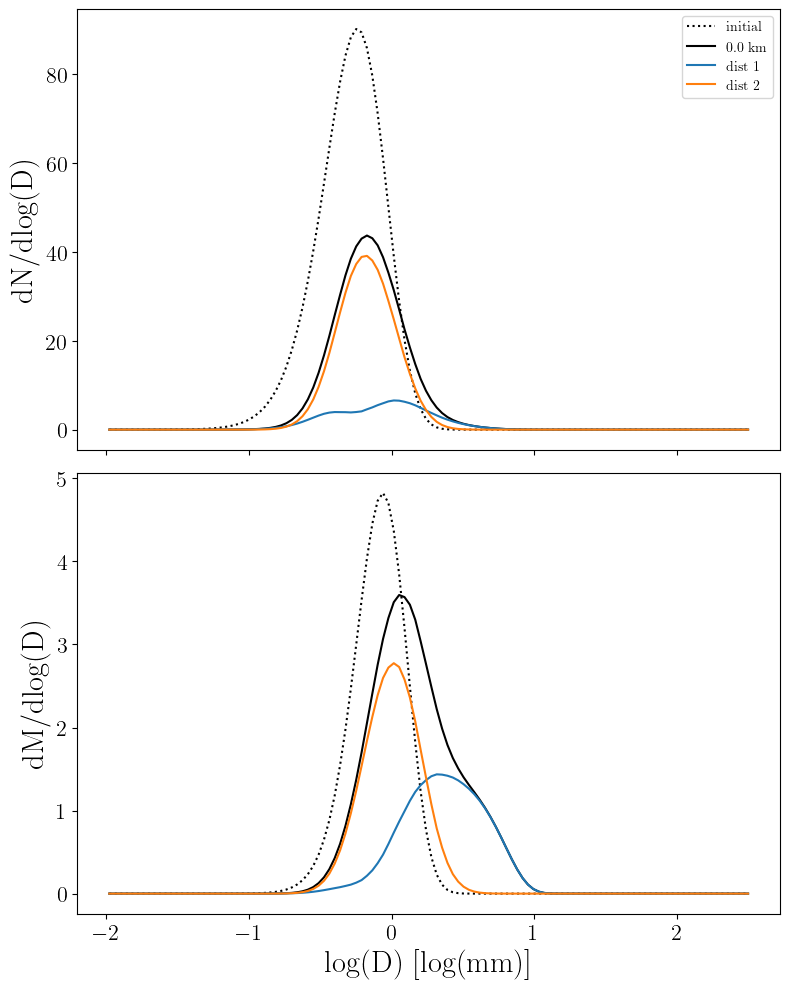

In [9]:
s4_snow_SS.plot_dists(hind=-1,x_axis='size',plot_habits=True)